In [7]:
%pip install numpy pandas matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


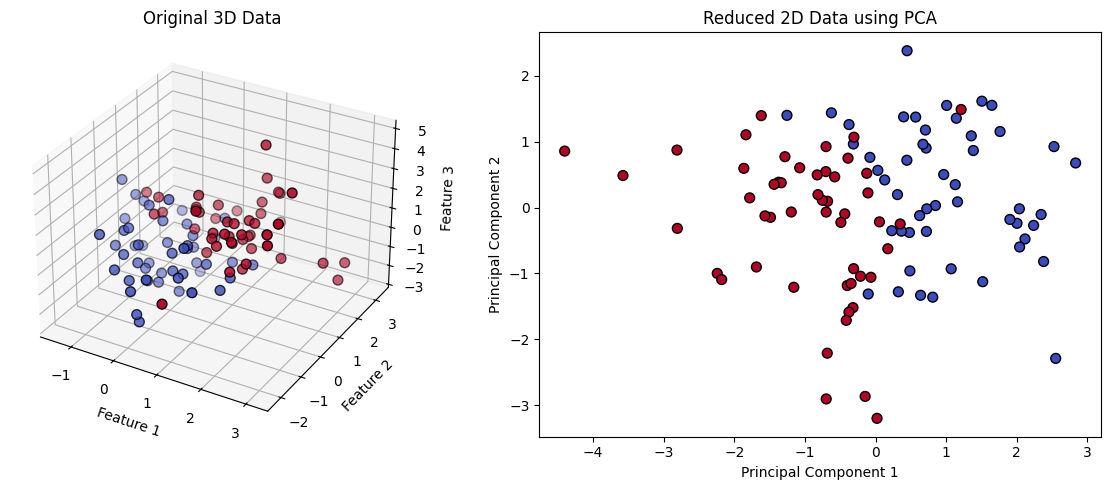

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Generate synthetic 3D data
np.random.seed(42)
mean1 = [0, 0, 0]
cov1 = np.eye(3)
data1 = np.random.multivariate_normal(mean1, cov1, 50)

mean2 = [1, 1, 1]
cov2 = np.eye(3)
data2 = np.random.multivariate_normal(mean2, cov2, 50)

X = np.vstack((data1, data2))
y = np.array([0]*50 + [1]*50)

# -------------------------------------------------------
# Step-by-step PCA
# -------------------------------------------------------

# 2. Mean-centering the data
X_meaned = X - np.mean(X, axis=0)

# 3. Compute the covariance matrix
cov_mat = np.cov(X_meaned.T)

# 4. Compute eigenvalues and eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# 5. Sort eigenvectors by decreasing eigenvalues
sorted_indices = np.argsort(eigen_vals)[::-1]
eigen_vals = eigen_vals[sorted_indices]
eigen_vecs = eigen_vecs[:, sorted_indices]

# 6. Select the top 2 eigenvectors for 2D projection
top2_eigen_vecs = eigen_vecs[:, :2]

# 7. Project the data onto the 2 principal components
X_reduced = X_meaned.dot(top2_eigen_vecs)

# -------------------------------------------------------
# Visualization
# -------------------------------------------------------
fig = plt.figure(figsize=(12, 5))

# Original 3D data
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm', s=50, edgecolor='k')
ax1.set_title("Original 3D Data")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.set_zlabel("Feature 3")

# Projected 2D data after PCA
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='coolwarm', s=50, edgecolor='k')
ax2.set_title("Reduced 2D Data using PCA")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

